In [3]:
# Set up environment with libraries & data

# Importing Packages/Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import itertools

from tqdm.notebook import tqdm

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

from imblearn.over_sampling import SMOTE

from six import StringIO

from IPython.display import Image

import statsmodels.formula.api as smf

import pydotplus

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Accessing Dataset
r_train = pd.read_csv("data/train.csv")
r_test = pd.read_csv("data/test.csv")

### EDA for Train

In [4]:
r_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
r_train.shape

(8693, 14)

In [6]:
r_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
r_train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')>

In [8]:
r_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### EDA for Test

In [9]:
r_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
r_test.shape

(4277, 13)

In [11]:
r_test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [12]:
r_test.value_counts("HomePlanet")

HomePlanet
Earth     2263
Europa    1002
Mars       925
dtype: int64

In [13]:
r_test.value_counts("CryoSleep")

CryoSleep
False    2640
True     1544
dtype: int64

In [14]:
r_test.value_counts("Cabin")

Cabin
G/160/P     8
B/31/P      7
E/228/S     7
D/273/S     7
G/748/S     7
           ..
F/1291/S    1
F/1292/P    1
F/1297/S    1
F/1298/S    1
T/4/P       1
Length: 3265, dtype: int64

In [15]:
r_test.value_counts("Destination")

Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
dtype: int64

In [16]:
r_test.value_counts("Age")

Age
18.0    176
22.0    163
19.0    162
20.0    160
24.0    158
       ... 
74.0      2
75.0      2
79.0      2
77.0      1
78.0      1
Length: 79, dtype: int64

In [17]:
r_test.value_counts("VIP")

VIP
False    4110
True       74
dtype: int64

In [18]:
r_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Cleaning Train

In [19]:
le = preprocessing.LabelEncoder()

# Cleaning and Nulls
train = r_train[['HomePlanet',
                 'CryoSleep',
                 'Cabin',
                 'Destination',
                 'Age',
                 'VIP',
                 'RoomService',
                 'FoodCourt',
                 'ShoppingMall',
                 'Spa',
                 'VRDeck',
                 'Transported']]

train[['CabinFloor','CabinNumber','CabinType']] = train['Cabin'].str.split(pat='/',expand=True)

train = train.astype({'HomePlanet':'category',
                      'CryoSleep':'string',
                      'Cabin':'string',
                      'Destination':'category',
                      'Age':'float',
                      'VIP':'string',
                      'RoomService':'float',
                      'FoodCourt':'float',
                      'ShoppingMall':'float',
                      'Spa':'float',
                      'VRDeck':'float',
                      'Transported':'string',
                      'CabinFloor':'category',
                      'CabinNumber':'float',
                      'CabinType':'category'})

# 2
train['CryoSleep_N'] = train['CryoSleep'].map({'True':1,'False':0})
train['VIP_N'] = train['VIP'].map({'True':1,'False':0})
train['Transported_N'] = train['Transported'].map({'True':1,'False':0})
train['CabinType_N'] = le.fit_transform(train['CabinType'])

fillnalist_1 = ['CryoSleep_N','VIP_N','Transported_N','CabinType_N']

for column in fillnalist_1:
    prob = (train[column].sum() / train[column].notnull().sum())
    train[column] = train[column].apply(lambda x:
                                        1 if x == 1
                                        else(0 if x == 0
                                             else(1 if random.random() < prob
                                                  else 0)))

train['HomePlanet_N'] = le.fit_transform(train['HomePlanet'])
train['Destination_N'] = le.fit_transform(train['Destination'])

fillnalist_2 = ['HomePlanet_N','Destination_N']

for column in fillnalist_2:
    prob2 = (len(train[train[column]==2]) / train[column].notnull().sum())
    prob1 = (len(train[train[column]==1]) / train[column].notnull().sum())
    train[column] = train[column].apply(lambda x:
                                        2 if x == 2
                                        else(1 if x == 1
                                             else(0 if x == 0
                                                  else(2 if random.random() < prob2
                                                       else (1 if random.random() < (prob1+prob2)
                                                             else 0)))))

train['CabinFloor_N'] = le.fit_transform(train['CabinFloor'])
prob7 = (len(train[train['CabinFloor_N']==7]) / train['CabinFloor_N'].notnull().sum())
prob6 = (len(train[train['CabinFloor_N']==6]) / train['CabinFloor_N'].notnull().sum())
prob5 = (len(train[train['CabinFloor_N']==5]) / train['CabinFloor_N'].notnull().sum())
prob4 = (len(train[train['CabinFloor_N']==4]) / train['CabinFloor_N'].notnull().sum())
prob3 = (len(train[train['CabinFloor_N']==3]) / train['CabinFloor_N'].notnull().sum())
prob2 = (len(train[train['CabinFloor_N']==2]) / train['CabinFloor_N'].notnull().sum())
prob1 = (len(train[train['CabinFloor_N']==1]) / train['CabinFloor_N'].notnull().sum())
train['CabinFloor_N'] = train['CabinFloor_N'].apply(lambda x:
                                                    7 if x == 7 else(6 if x == 6 else(5 if x == 5 else(4 if x == 4 else(3 if x == 3 else(2 if x == 2 else(1 if x == 1 else(0 if x == 0
                                                    else(7 if random.random() < prob7
                                                        else(6 if random.random() < (prob7+prob6)
                                                             else(5 if random.random() < (prob7+prob6+prob5)
                                                                 else(4 if random.random() < (prob7+prob6+prob5+prob4)
                                                                     else(3 if random.random() < (prob7+prob6+prob5+prob4+prob3)
                                                                         else(2 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2)
                                                                         else(1 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2+prob1)
                                                                         else 0)))))))))))))))

# Dummies
dum_HomePlanet = pd.get_dummies(train['HomePlanet_N'],prefix='HomePlanet',prefix_sep='_')
dum_Destination = pd.get_dummies(train['Destination_N'],prefix='Destination',prefix_sep='_')
dum_CabinFloor = pd.get_dummies(train['CabinFloor_N'],prefix='CabinFloor',prefix_sep='_')
dum_CabinType = pd.get_dummies(train['CabinType_N'],prefix='CabinType',prefix_sep='_')
dummies_list = [dum_HomePlanet,dum_Destination,dum_CabinFloor,dum_CabinType]

for df in dummies_list:
    train = train.merge(df,
                        how="left",
                        left_index=True,
                        right_index=True)

train['Age'] = train['Age'].astype('float').fillna(train['Age'].median()).astype('float')
train['RoomService'] = train['RoomService'].astype('float').fillna(train['RoomService'].median()).astype('float')
train['FoodCourt'] = train['FoodCourt'].astype('float').fillna(train['FoodCourt'].median()).astype('float')
train['ShoppingMall'] = train['ShoppingMall'].astype('float').fillna(train['ShoppingMall'].median()).astype('float')
train['Spa'] = train['Spa'].astype('float').fillna(train['Spa'].median()).astype('float')
train['VRDeck'] = train['VRDeck'].astype('float').fillna(train['VRDeck'].median()).astype('float')
train['CabinNumber'] = train['CabinNumber'].astype('float').fillna(train['CabinNumber'].median()).astype('float')

# Bins
train['AgeBin'] = pd.cut(train['Age'], bins=5,labels=(1,2,3,4,5))
train['RoomServiceBin'] = pd.cut(train['RoomService'], bins=5,labels=(1,2,3,4,5))
train['FoodCourtBin'] = pd.cut(train['FoodCourt'], bins=5,labels=(1,2,3,4,5))
train['ShoppingMallBin'] = pd.cut(train['ShoppingMall'], bins=5,labels=(1,2,3,4,5))
train['SpaBin'] = pd.cut(train['Spa'], bins=5,labels=(1,2,3,4,5))
train['VRDeckBin'] = pd.cut(train['VRDeck'], bins=5,labels=(1,2,3,4,5))
train['CabinNumberBin'] = pd.cut(train['CabinNumber'], bins=5,labels=(1,2,3,4,5))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   HomePlanet       8492 non-null   category
 1   CryoSleep        8476 non-null   string  
 2   Cabin            8494 non-null   string  
 3   Destination      8511 non-null   category
 4   Age              8693 non-null   float64 
 5   VIP              8490 non-null   string  
 6   RoomService      8693 non-null   float64 
 7   FoodCourt        8693 non-null   float64 
 8   ShoppingMall     8693 non-null   float64 
 9   Spa              8693 non-null   float64 
 10  VRDeck           8693 non-null   float64 
 11  Transported      8693 non-null   string  
 12  CabinFloor       8494 non-null   category
 13  CabinNumber      8693 non-null   float64 
 14  CabinType        8494 non-null   category
 15  CryoSleep_N      8693 non-null   int64   
 16  VIP_N            8693 non-null   int64   


In [20]:
train_final = train[['HomePlanet_N',
                      'HomePlanet_0',
                      'HomePlanet_1',
                      'HomePlanet_2',
                      'CryoSleep_N',
                      'CabinFloor_N',
                      'CabinFloor_0',
                      'CabinFloor_1',
                      'CabinFloor_2',
                      'CabinFloor_3',
                      'CabinFloor_4',
                      'CabinFloor_5',
                      'CabinFloor_6',
                      'CabinFloor_7',
                      'CabinNumber',
                      'CabinNumberBin',
                      'CabinType_N',
                      'CabinType_0',
                      'CabinType_1',
                      'Destination_N',
                      'Destination_0',
                      'Destination_1',
                      'Destination_2',
                      'Age',
                      'AgeBin',
                      'VIP_N',
                      'RoomService',
                      'RoomServiceBin',
                      'FoodCourt',
                      'FoodCourtBin',
                      'ShoppingMall',
                      'ShoppingMallBin',
                      'Spa',
                      'SpaBin',
                      'VRDeck',
                      'VRDeckBin',
                      'Transported',
                      'Transported_N']]

train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   HomePlanet_N     8693 non-null   int64   
 1   HomePlanet_0     8693 non-null   uint8   
 2   HomePlanet_1     8693 non-null   uint8   
 3   HomePlanet_2     8693 non-null   uint8   
 4   CryoSleep_N      8693 non-null   int64   
 5   CabinFloor_N     8693 non-null   int64   
 6   CabinFloor_0     8693 non-null   uint8   
 7   CabinFloor_1     8693 non-null   uint8   
 8   CabinFloor_2     8693 non-null   uint8   
 9   CabinFloor_3     8693 non-null   uint8   
 10  CabinFloor_4     8693 non-null   uint8   
 11  CabinFloor_5     8693 non-null   uint8   
 12  CabinFloor_6     8693 non-null   uint8   
 13  CabinFloor_7     8693 non-null   uint8   
 14  CabinNumber      8693 non-null   float64 
 15  CabinNumberBin   8693 non-null   category
 16  CabinType_N      8693 non-null   int64   


### Cleaning Test

In [21]:
le = preprocessing.LabelEncoder()

# Cleaning and Nulls
test = r_test[['PassengerId',
               'HomePlanet',
               'CryoSleep',
               'Cabin',
               'Destination',
               'Age',
               'VIP',
               'RoomService',
               'FoodCourt',
               'ShoppingMall',
               'Spa',
               'VRDeck']]

test[['CabinFloor','CabinNumber','CabinType']] = test['Cabin'].str.split(pat='/',expand=True)

test = test.astype({'HomePlanet':'category',
                      'CryoSleep':'string',
                      'Cabin':'string',
                      'Destination':'category',
                      'Age':'float',
                      'VIP':'string',
                      'RoomService':'float',
                      'FoodCourt':'float',
                      'ShoppingMall':'float',
                      'Spa':'float',
                      'VRDeck':'float',
                      'CabinFloor':'category',
                      'CabinNumber':'float',
                      'CabinType':'category'})

# 2
test['CryoSleep_N'] = test['CryoSleep'].map({'True':1,'False':0})
test['VIP_N'] = test['VIP'].map({'True':1,'False':0})
test['CabinType_N'] = le.fit_transform(test['CabinType'])

fillnalist_1 = ['CryoSleep_N','VIP_N','CabinType_N']

for column in fillnalist_1:
    prob = (test[column].sum() / test[column].notnull().sum())
    test[column] = test[column].apply(lambda x:
                                        1 if x == 1
                                        else(0 if x == 0
                                             else(1 if random.random() < prob
                                                  else 0)))

test['HomePlanet_N'] = le.fit_transform(test['HomePlanet'])
test['Destination_N'] = le.fit_transform(test['Destination'])

fillnalist_2 = ['HomePlanet_N','Destination_N']

for column in fillnalist_2:
    prob2 = (len(test[test[column]==2]) / test[column].notnull().sum())
    prob1 = (len(test[test[column]==1]) / test[column].notnull().sum())
    test[column] = test[column].apply(lambda x:
                                        2 if x == 2
                                        else(1 if x == 1
                                             else(0 if x == 0
                                                  else(2 if random.random() < prob2
                                                       else (1 if random.random() < (prob1+prob2)
                                                             else 0)))))

test['CabinFloor_N'] = le.fit_transform(test['CabinFloor'])
prob7 = (len(test[test['CabinFloor_N']==7]) / test['CabinFloor_N'].notnull().sum())
prob6 = (len(test[test['CabinFloor_N']==6]) / test['CabinFloor_N'].notnull().sum())
prob5 = (len(test[test['CabinFloor_N']==5]) / test['CabinFloor_N'].notnull().sum())
prob4 = (len(test[test['CabinFloor_N']==4]) / test['CabinFloor_N'].notnull().sum())
prob3 = (len(test[test['CabinFloor_N']==3]) / test['CabinFloor_N'].notnull().sum())
prob2 = (len(test[test['CabinFloor_N']==2]) / test['CabinFloor_N'].notnull().sum())
prob1 = (len(test[test['CabinFloor_N']==1]) / test['CabinFloor_N'].notnull().sum())
test['CabinFloor_N'] = test['CabinFloor_N'].apply(lambda x:
                                                    7 if x == 7 else(6 if x == 6 else(5 if x == 5 else(4 if x == 4 else(3 if x == 3 else(2 if x == 2 else(1 if x == 1 else(0 if x == 0
                                                    else(7 if random.random() < prob7
                                                        else(6 if random.random() < (prob7+prob6)
                                                             else(5 if random.random() < (prob7+prob6+prob5)
                                                                 else(4 if random.random() < (prob7+prob6+prob5+prob4)
                                                                     else(3 if random.random() < (prob7+prob6+prob5+prob4+prob3)
                                                                         else(2 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2)
                                                                         else(1 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2+prob1)
                                                                         else 0)))))))))))))))

# Dummies
dum_HomePlanet = pd.get_dummies(test['HomePlanet_N'],prefix='HomePlanet',prefix_sep='_')
dum_Destination = pd.get_dummies(test['Destination_N'],prefix='Destination',prefix_sep='_')
dum_CabinFloor = pd.get_dummies(test['CabinFloor_N'],prefix='CabinFloor',prefix_sep='_')
dum_CabinType = pd.get_dummies(test['CabinType_N'],prefix='CabinType',prefix_sep='_')
dummies_list = [dum_HomePlanet,dum_Destination,dum_CabinFloor,dum_CabinType]

for df in dummies_list:
    test = test.merge(df,
                        how="left",
                        left_index=True,
                        right_index=True)

test['Age'] = test['Age'].astype('float').fillna(test['Age'].median()).astype('float')
test['RoomService'] = test['RoomService'].astype('float').fillna(test['RoomService'].median()).astype('float')
test['FoodCourt'] = test['FoodCourt'].astype('float').fillna(test['FoodCourt'].median()).astype('float')
test['ShoppingMall'] = test['ShoppingMall'].astype('float').fillna(test['ShoppingMall'].median()).astype('float')
test['Spa'] = test['Spa'].astype('float').fillna(test['Spa'].median()).astype('float')
test['VRDeck'] = test['VRDeck'].astype('float').fillna(test['VRDeck'].median()).astype('float')
test['CabinNumber'] = test['CabinNumber'].astype('float').fillna(test['CabinNumber'].median()).astype('float')

# Bins
test['AgeBin'] = pd.cut(test['Age'], bins=5,labels=(1,2,3,4,5))
test['RoomServiceBin'] = pd.cut(test['RoomService'], bins=5,labels=(1,2,3,4,5))
test['FoodCourtBin'] = pd.cut(test['FoodCourt'], bins=5,labels=(1,2,3,4,5))
test['ShoppingMallBin'] = pd.cut(test['ShoppingMall'], bins=5,labels=(1,2,3,4,5))
test['SpaBin'] = pd.cut(test['Spa'], bins=5,labels=(1,2,3,4,5))
test['VRDeckBin'] = pd.cut(test['VRDeck'], bins=5,labels=(1,2,3,4,5))
test['CabinNumberBin'] = pd.cut(test['CabinNumber'], bins=5,labels=(1,2,3,4,5))

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      4277 non-null   object  
 1   HomePlanet       4190 non-null   category
 2   CryoSleep        4184 non-null   string  
 3   Cabin            4177 non-null   string  
 4   Destination      4185 non-null   category
 5   Age              4277 non-null   float64 
 6   VIP              4184 non-null   string  
 7   RoomService      4277 non-null   float64 
 8   FoodCourt        4277 non-null   float64 
 9   ShoppingMall     4277 non-null   float64 
 10  Spa              4277 non-null   float64 
 11  VRDeck           4277 non-null   float64 
 12  CabinFloor       4177 non-null   category
 13  CabinNumber      4277 non-null   float64 
 14  CabinType        4177 non-null   category
 15  CryoSleep_N      4277 non-null   int64   
 16  VIP_N            4277 non-null   int64   


In [22]:
test_final = test[['PassengerId',
                   'HomePlanet_N',
                   'HomePlanet_0',
                   'HomePlanet_1',
                   'HomePlanet_2',
                   'CryoSleep_N',
                   'CabinFloor_N',
                   'CabinFloor_0',
                   'CabinFloor_1',
                   'CabinFloor_2',
                   'CabinFloor_3',
                   'CabinFloor_4',
                   'CabinFloor_5',
                   'CabinFloor_6',
                   'CabinFloor_7',
                   'CabinNumber',
                   'CabinNumberBin',
                   'CabinType_N',
                   'CabinType_0',
                   'CabinType_1',
                   'Destination_N',
                   'Destination_0',
                   'Destination_1',
                   'Destination_2',
                   'Age',
                   'AgeBin',
                   'VIP_N',
                   'RoomService',
                   'RoomServiceBin',
                   'FoodCourt',
                   'FoodCourtBin',
                   'ShoppingMall',
                   'ShoppingMallBin',
                   'Spa',
                   'SpaBin',
                   'VRDeck',
                   'VRDeckBin']]
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      4277 non-null   object  
 1   HomePlanet_N     4277 non-null   int64   
 2   HomePlanet_0     4277 non-null   uint8   
 3   HomePlanet_1     4277 non-null   uint8   
 4   HomePlanet_2     4277 non-null   uint8   
 5   CryoSleep_N      4277 non-null   int64   
 6   CabinFloor_N     4277 non-null   int64   
 7   CabinFloor_0     4277 non-null   uint8   
 8   CabinFloor_1     4277 non-null   uint8   
 9   CabinFloor_2     4277 non-null   uint8   
 10  CabinFloor_3     4277 non-null   uint8   
 11  CabinFloor_4     4277 non-null   uint8   
 12  CabinFloor_5     4277 non-null   uint8   
 13  CabinFloor_6     4277 non-null   uint8   
 14  CabinFloor_7     4277 non-null   uint8   
 15  CabinNumber      4277 non-null   float64 
 16  CabinNumberBin   4277 non-null   category


### Feature Engineering, Correlations

In [23]:
train_final.columns.to_list()

['HomePlanet_N',
 'HomePlanet_0',
 'HomePlanet_1',
 'HomePlanet_2',
 'CryoSleep_N',
 'CabinFloor_N',
 'CabinFloor_0',
 'CabinFloor_1',
 'CabinFloor_2',
 'CabinFloor_3',
 'CabinFloor_4',
 'CabinFloor_5',
 'CabinFloor_6',
 'CabinFloor_7',
 'CabinNumber',
 'CabinNumberBin',
 'CabinType_N',
 'CabinType_0',
 'CabinType_1',
 'Destination_N',
 'Destination_0',
 'Destination_1',
 'Destination_2',
 'Age',
 'AgeBin',
 'VIP_N',
 'RoomService',
 'RoomServiceBin',
 'FoodCourt',
 'FoodCourtBin',
 'ShoppingMall',
 'ShoppingMallBin',
 'Spa',
 'SpaBin',
 'VRDeck',
 'VRDeckBin',
 'Transported',
 'Transported_N']

In [24]:
train_final['TotalSpending'] = train_final['RoomService']+train_final['FoodCourt']+train_final['ShoppingMall']+train_final['Spa']+train_final['VRDeck']

In [25]:
heatmap = train_final[[
                'HomePlanet_N',
#                'HomePlanet_0',
#                'HomePlanet_1',
#                'HomePlanet_2',
#                'CryoSleep_N',
                'CabinFloor_N',
#                'CabinFloor_0',
#                'CabinFloor_1',
#                'CabinFloor_2',
#                'CabinFloor_3',
#                'CabinFloor_4',
#                'CabinFloor_5',
#                'CabinFloor_6',
#                'CabinFloor_7',
#                'CabinNumber',
#                'CabinNumberBin',
                'CabinType_N',
#                'CabinType_0',
#                'CabinType_1',
                'Destination_N',
#                'Destination_0',
#                'Destination_1',
#                'Destination_2',
                'Age',
#                'AgeBin',
                'VIP_N',
                'RoomService',
#                'RoomServiceBin',
                'FoodCourt',
#                'FoodCourtBin',
                'ShoppingMall',
#                'ShoppingMallBin',
                'Spa',
#                'SpaBin',
                'VRDeck',
#                'VRDeckBin',
                'TotalSpending'
                      ]]

<AxesSubplot: >

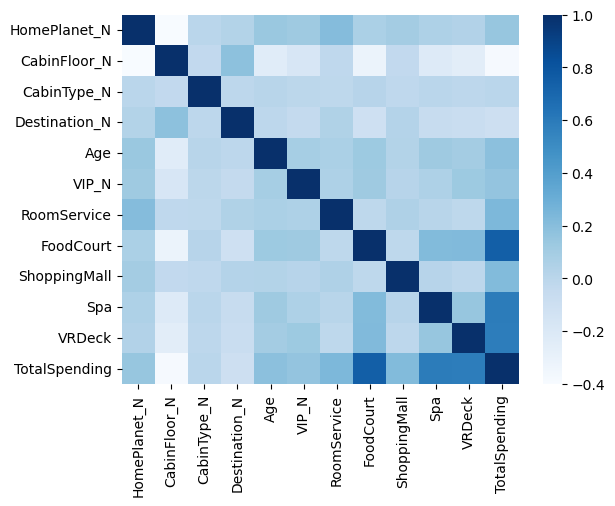

In [26]:
sns.heatmap(heatmap.corr(),
            cmap='Blues',
            annot=False)

### Machine Learning

In [27]:
train_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['HomePlanet_N', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2',
       'CryoSleep_N', 'CabinFloor_N', 'CabinFloor_0', 'CabinFloor_1',
       'CabinFloor_2', 'CabinFloor_3', 'CabinFloor_4', 'CabinFloor_5',
       'CabinFloor_6', 'CabinFloor_7', 'CabinNumber', 'CabinNumberBin',
       'CabinType_N', 'CabinType_0', 'CabinType_1', 'Destination_N',
       'Destination_0', 'Destination_1', 'Destination_2', 'Age', 'AgeBin',
       'VIP_N', 'RoomService', 'RoomServiceBin', 'FoodCourt', 'FoodCourtBin',
       'ShoppingMall', 'ShoppingMallBin', 'Spa', 'SpaBin', 'VRDeck',
       'VRDeckBin', 'Transported', 'Transported_N', 'TotalSpending'],
      dtype='object')>

In [28]:
test_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['PassengerId', 'HomePlanet_N', 'HomePlanet_0', 'HomePlanet_1',
       'HomePlanet_2', 'CryoSleep_N', 'CabinFloor_N', 'CabinFloor_0',
       'CabinFloor_1', 'CabinFloor_2', 'CabinFloor_3', 'CabinFloor_4',
       'CabinFloor_5', 'CabinFloor_6', 'CabinFloor_7', 'CabinNumber',
       'CabinNumberBin', 'CabinType_N', 'CabinType_0', 'CabinType_1',
       'Destination_N', 'Destination_0', 'Destination_1', 'Destination_2',
       'Age', 'AgeBin', 'VIP_N', 'RoomService', 'RoomServiceBin', 'FoodCourt',
       'FoodCourtBin', 'ShoppingMall', 'ShoppingMallBin', 'Spa', 'SpaBin',
       'VRDeck', 'VRDeckBin'],
      dtype='object')>

In [29]:
# Selecting the x-variables
x_var = ['HomePlanet_N',
#         'HomePlanet_0',
#         'HomePlanet_1',
#         'HomePlanet_2',
         'CryoSleep_N',
         'CabinFloor_N',
#         'CabinFloor_0',
#         'CabinFloor_1',
#         'CabinFloor_2',
#         'CabinFloor_3',
#         'CabinFloor_4',
#         'CabinFloor_5',
#         'CabinFloor_6',
#         'CabinFloor_7',
#         'CabinNumber',
#         'CabinNumberBin',
         'CabinType_N',
#         'CabinType_0',
#         'CabinType_1',
         'Destination_N',
#         'Destination_0',
#         'Destination_1',
#         'Destination_2',
         'Age',
#         'AgeBin',
         'VIP_N',
#         'RoomService',
         'RoomServiceBin',
#         'FoodCourt',
         'FoodCourtBin',
#         'ShoppingMall',
         'ShoppingMallBin',
#         'Spa',
         'SpaBin',
#         'VRDeck',
         'VRDeckBin',
#         'TotalSpending'
        ]

In [32]:
# DEFINING X AND Y VARIABLES
x = train_final.loc[:, x_var]
y = train_final.loc[:, 'Transported_N']
col_names = x.columns

# SCALING DATA
scaler = RobustScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

# SPLITTING DATA - with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_scaled,
            y,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y)

# BALANCING DATA
os = SMOTE(random_state=0)

x_smote,y_smote = os.fit_resample(x_train, y_train)
x_smote = pd.DataFrame(data = x_smote,
                       columns = x_var)
y_smote= pd.Series(data=y_smote)

# ADABOOST
adaboost = AdaBoostClassifier()
adaboost = adaboost.fit(x_smote.values,y_smote)
y_predicted = adaboost.predict(x_test)

# Model Performance Analysis
con_matrix = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test,y_predicted)
AUC = roc_auc_score(y_test, y_predicted).round(4)
MSE = mean_squared_error(y_test, y_predicted).round(4)
Score = adaboost.score(x_test,y_test).round(4)

# 6. Printing results
# Accuracy
print(f"Score: {Score}")
print(f"""{"-"*50}""")
# Confusion Matrix
print(f"""Confusion Matrix 
{con_matrix}""")
print(f"""{"-"*50}""")
# Clasification Matrix
print(f"""Classification Report
{class_report}""")
print(f"""{"-"*50}""")
# AUC
print(f"AUC: {AUC}")
print(f"""{"-"*50}""")
# MSE
print(f"MSE: {MSE}")

Score: 0.7328
--------------------------------------------------
Confusion Matrix 
[[842 237]
 [344 751]]
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1079
           1       0.76      0.69      0.72      1095

    accuracy                           0.73      2174
   macro avg       0.74      0.73      0.73      2174
weighted avg       0.74      0.73      0.73      2174

--------------------------------------------------
AUC: 0.7331
--------------------------------------------------
MSE: 0.2672


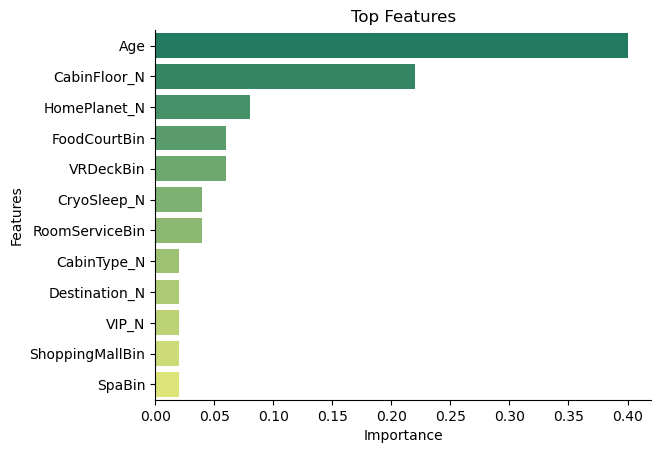

In [33]:
# Identifying Key Features
y_variable=y
x_variables=x
key_features = pd.Series(adaboost.feature_importances_,index=x_variables.columns).sort_values(ascending=False)

# Graph
sns.barplot(x=key_features, y=key_features.index,palette="summer")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top Features')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.show()

In [34]:
# CSV

x_test2 = test_final.loc[:,x_var]
y_predicted_test = adaboost.predict(x_test2)

predictions = pd.DataFrame(data = {'PassengerId':test_final['PassengerId'],
                                   'Transported':y_predicted_test.astype(bool)})

predictions.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [36]:
# predictions.to_csv(path_or_buf = 'submission-adaboost.csv',index=False)